<a href="https://colab.research.google.com/github/haroldfox/ts-stuy-2019/blob/master/notebooks/01_exploring_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today

1. Welcome and introductions
2. What is Data Science? Math, programming, and specific knowledge
3. Setup: github and colaboratory
4. Review of python
5. Introduction to pandas

# Course Schedule

|Session|Date|Topic|Dataset|
|------------|
|1|Mar 6|Introduction and Pandas|IMDB movies|
|2|Mar 13|Data visualization|Spotify hits|
|3|Mar 20|Statistics: distributions and randomness|Basketball stats|
|4|Mar 27|Statistics: hypothesis testing|Polling and elections|
|5|Apr 3|Regression: single variable|World happiness|
|6|Apr 10|Regression: multivariable|World happiness|
|7|Apr 17|Machine learning|Text classification|
|8|May 1|FInal project prep||
|9|May 8|Final project presentations||




# Intro to github and colaboratory

We will use this repo: https://github.com/haroldfox/ts-stuy-2019

Navigate to https://colab.research.google.com/github

Set haroldfox/ts-stuy-2019 as the repo

Choose notebooks/01_exploring_data_in_python.ipynb from the **list**

The key data scientist's tool is the jupyter notebook, a mix of code and text. From colaboratory, you can add code cells or text cells and reorder them

# Review of python

In [1]:
"Hello " + "there"

'Hello there'

In [2]:
1+1

2

In [3]:
['Lists', 'contain', 'multiple', 'items']

['Lists', 'contain', 'multiple', 'items']

Dictionaries map keys to data

In [4]:
{'Yankees': 'New York', 'Red Sox': 'Boston', 'Blue Jays': 'Toronto', 'Dodgers': 'Los Angeles'}

{'Blue Jays': 'Toronto',
 'Dodgers': 'Los Angeles',
 'Red Sox': 'Boston',
 'Yankees': 'New York'}

In [0]:
def capitalize(s):
  return ' '.join([w[0].upper() + w[1:].lower() for w in s.split(' ')])

In [6]:
capitalize('a lower case sentence')

'A Lower Case Sentence'

# Exploring Data in pandas

## 1. Getting Started 

### Welcome

Welcome to Jupyter, a notebook environment for python. We will use Jupyter notebooks throughout this course to explore, visualize, and analyze data. You can learn more about Jupyter here: http://jupyter.readthedocs.io/en/latest/index.html

### Import required python libraries

We begin by importing a few basic python libraries for data analysis and visualization. We will start with the following:

- pandas: data analysis
- numpy: numerical computing and linear algebra in python
- datetime: date and time functionality
- matplotlib: plotting and data visualization tools
- seaborn: interface to matplotlib for easier (and prettier) plotting

In [0]:
import pandas as pd   # We give the libraries short names for easier referencing
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# This allows us to display plots right within our Jupyter notebook

### Set notebook display options

Pandas is a python library for data analysis. We will begin by using it here to set display options so that we can see a larger number of rows and columns than the default. You can read more about setting options here: https://pandas.pydata.org/pandas-docs/stable/options.html



In [8]:
# -- What is the default maximum number of columns displayed?
pd.options.display.max_columns

20

In [9]:
# -- What is the default maximum number of rows displayed?
pd.options.display.max_rows

60

In [0]:
# -- We can change the default number of rows and columns
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

In [11]:
# -- Which other kinds of options are available?
dir(pd.options)

['compute', 'display', 'html', 'io', 'mode', 'plotting']

### Read documentation in your Jupyter notebook
Jupyter conveniently allows us to read documentation on python functions and other objects within our notebook. This can be done by either preceding or following the name of the object with a '?' (question mark). We illustrate this here with the 'set_option' function provided by pandas.

In [0]:
pd.set_option?

In [13]:
# -- 
'''
Getting Familiar with the ipython notebook environment
'''

"""
Session 1: Exploring Data in Python

1.	Getting Started
    - working in jupyter
    - display options
    - importing libraries (and what these libraries contain)
2.	Introduction to pandas
    - python brief review (control structures, data structures, functions, lambda)
    - pandas 
        - 
3.	Loading and Summarizing Data
4.	Visualizing Data in pandas
    - 

5.	Cleaning and Tidying Data

Session 2: Visualizing and Simulating Data

1.	Brief Recap of Last Session
    - What did we learn last time?
    - Review 
2.	Data Visualization
- 
3.	Handling Missing Data
4.	Random Numbers and Sampling
5.	Simulation for Data Analysis

"""

'\nSession 1: Exploring Data in Python\n\n1.\tGetting Started\n    - working in jupyter\n    - display options\n    - importing libraries (and what these libraries contain)\n2.\tIntroduction to pandas\n    - python brief review (control structures, data structures, functions, lambda)\n    - pandas \n        - \n3.\tLoading and Summarizing Data\n4.\tVisualizing Data in pandas\n    - \n\n5.\tCleaning and Tidying Data\n\nSession 2: Visualizing and Simulating Data\n\n1.\tBrief Recap of Last Session\n    - What did we learn last time?\n    - Review \n2.\tData Visualization\n- \n3.\tHandling Missing Data\n4.\tRandom Numbers and Sampling\n5.\tSimulation for Data Analysis\n\n'

## 2. Introduction to pandas

For all this information and more, see https://pandas.pydata.org/pandas-docs/stable/10min.html

In this class, we'll be making extensive use of a Python library called Pandas. You may be familiar with native python data structures like lists and dictionaries. Pandas offers two data structures called DataFrames and Series which have a lot of built-in functionality that makes analyzing data easy.   

Let's start off by introducing the Series. Series objects are similar in flavor to dictionaries. They have an 'index' that you can think of as the key of a dictionary, which maps to values. In fact, you can create a Series from a dictionary:

In [14]:
underlying_dict = {i:2*i for i in range(10)} # This is called 'list comprehension'! 
sers = pd.Series(underlying_dict)
sers  

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
dtype: int64

In [15]:
# Access entries by .loc:
sers.loc[3]

6

The index need not be an integer. For example:

In [16]:
underlying_dict = {'a':0, 'b':1, 'c':2}
pd.Series(underlying_dict).loc['a']

0

In [17]:
# You can also make a Series from a list if you use Pandas' 
# default integer index:
pd.Series([2*i for i in range(10)])

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
dtype: int64

You can think of a DataFrame as a 2D array or matrix. Like a Series, a DataFrame has an index, but DataFrames also have different columns. We can build up a DataFrame as a dictionary of multiple Series':

In [18]:
sers_one = pd.Series({'a':0,'b':1,'c':2})
sers_two = pd.Series({'a':3,'b':4,'c':5})
my_first_df = pd.DataFrame({'sers_one':sers_one, 'sers_two':sers_two})
my_first_df

,sers_one,sers_two
a,0,3
b,1,4
c,2,5


In [19]:
# Access a column this way:
display(my_first_df['sers_one'])

# Access a row this way:
display(my_first_df.loc['a'])

a    0
b    1
c    2
Name: sers_one, dtype: int64

sers_one    0
sers_two    3
Name: a, dtype: int64

In [20]:
# We can build up a DataFrame much faster than that. For instance, 
# check the output of the following: np.random.normal(size=(10,3))
# It returns a 2D array of normal random variables. 

my_second_df = pd.DataFrame(
    np.random.normal(size=(10,3)),columns = ['a','b','c'])
my_second_df

,a,b,c
0,-1.049229,1.728742,-0.453966
1,0.965889,0.199932,0.846845
2,0.882779,0.625322,2.090246
3,-0.444206,1.793110,0.078637
4,-0.570671,-1.041540,1.577948
5,-0.869489,0.846378,1.305604
6,-0.555018,0.497266,-0.231920
7,-1.065000,-0.339423,0.168888
8,0.071313,-1.172730,0.233048
9,-0.567254,3.070549,1.581751


Let's say we have a function that takes in rows of a DataFrame and spits out a number. We may want to apply this function to each row of our DataFrame and store the results in a new Series. Below, let's make up a simple function, and use a for-loop to accomplish this:

In [0]:
def f(row):
    return 2.*row['a']-row['b']*(row['c'])

In [0]:
apply_f_to_rows = {}
for i,row in my_second_df.iterrows():
    apply_f_to_rows[i] = f(row)
apply_f_to_rows = pd.Series(apply_f_to_rows)

We can accomplish the above with a single line of code using df.apply:

In [23]:
# Below, we set axis = 1 to specify that we want the function to be applied to each row.
# If you come up with a function that can take columns, you should set axis = 0
apply_f_to_rows_faster = my_second_df.apply(f,axis = 1)

# Test that the two results are the same!
# Hint: remember that to test if two values are the same we use ==
# Try np.all([True,True,False]) for a counter example:
np.all(apply_f_to_rows_faster == apply_f_to_rows)

True

In [24]:
my_second_df['d'] = 2 * my_second_df['a'] - my_second_df['b'] * my_second_df['c']
my_second_df

,a,b,c,d
0,-1.049229,1.728742,-0.453966,-1.313668
1,0.965889,0.199932,0.846845,1.762466
2,0.882779,0.625322,2.090246,0.458481
3,-0.444206,1.793110,0.078637,-1.029418
4,-0.570671,-1.041540,1.577948,0.502153
5,-0.869489,0.846378,1.305604,-2.844012
6,-0.555018,0.497266,-0.231920,-0.994711
7,-1.065000,-0.339423,0.168888,-2.072675
8,0.071313,-1.172730,0.233048,0.415929
9,-0.567254,3.070549,1.581751,-5.991350


## 3. Loading and Summarizing Data  

### Load data

Data can be loaded into a pandas data frame from a variety of file formats. In this session, we will load data on 5000 movies in The Movie Database (TMDB) from a csv file. To see the first few rows of a data frame, use df.head() as in the example below.

This dataset is available online on Kaggle: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
There are many other datasets available from Kaggle.

In [25]:
!git clone https://<your username>:<your password>@github.com/haroldfox/ts-stuy-2019

Cloning into 'ts-stuy-2019'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 48 (delta 8), reused 24 (delta 2), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [26]:
!ls

sample_data  ts-stuy-2019


In [0]:
movies = pd.read_csv('ts-stuy-2019/datasets/movie_metadata.csv')

In [28]:
movies.head(10)  # Try changing the number of rows and removing the argument to check what pandas uses as the default value

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [29]:
movies.head(10).T

,0,1,2,3,4,5,6,7,8,9
color,Color,Color,Color,Color,NaN,Color,Color,Color,Color,Color
director_name,James Cameron,Gore Verbinski,Sam Mendes,Christopher Nolan,Doug Walker,Andrew Stanton,Sam Raimi,Nathan Greno,Joss Whedon,David Yates
num_critic_for_reviews,723,302,602,813,NaN,462,392,324,635,375
duration,178,169,148,164,NaN,132,156,100,141,153
director_facebook_likes,0,563,0,22000,131,475,0,15,0,282
actor_3_facebook_likes,855,1000,161,23000,NaN,530,4000,284,19000,10000
actor_2_name,Joel David Moore,Orlando Bloom,Rory Kinnear,Christian Bale,Rob Walker,Samantha Morton,James Franco,Donna Murphy,Robert Downey Jr.,Daniel Radcliffe
actor_1_facebook_likes,1000,40000,11000,27000,131,640,24000,799,26000,25000
gross,7.60506e+08,3.09404e+08,2.00074e+08,4.48131e+08,NaN,7.30587e+07,3.3653e+08,2.00807e+08,4.58992e+08,3.01957e+08
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Adventure|Thriller,Action|Thriller,Documentary,Action|Adventure|Sci-Fi,Action|Adventure|Romance,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Action|Adventure|Sci-Fi,Adventure|Family|Fantasy|Mystery


We can view the dimensions of a data frame using df.shape. For example, here we see that our movies data has 5043 rows and 28 columns 

In [30]:
movies.shape

(5043, 28)

We can see the names of columns in a data frame using df.columns

In [31]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [32]:
movies.groupby('actor_2_name').count()['movie_title'].sort_values(ascending=False).head(20)

actor_2_name
Morgan Freeman         20
Charlize Theron        15
Brad Pitt              14
Meryl Streep           11
James Franco           11
Adam Sandler           10
Jason Flemyng          10
Thomas Kretschmann      9
Will Ferrell            9
Robert Duvall           9
Judy Greer              9
Scott Glenn             9
Steve Buscemi           9
Angelina Jolie Pitt     9
Bruce Willis            9
Stephen Root            8
Tom Wilkinson           8
Olivia Wilde            8
Kirsten Dunst           8
Jay Hernandez           8
Name: movie_title, dtype: int64

In [33]:
movies[movies['actor_2_name'] == 'Jason Flemyng'][['movie_title', 'director_name', 'title_year']]

,movie_title,director_name,title_year
101,The Curious Case of Benjamin Button,David Fincher,2008.0
213,Clash of the Titans,Louis Leterrier,2010.0
1096,From Hell,Albert Hughes,2001.0
1127,Deep Rising,Stephen Sommers,1998.0
1449,From Hell,Albert Hughes,2001.0
1559,Transporter 2,Louis Leterrier,2005.0
1778,Rob Roy,Michael Caton-Jones,1995.0
2650,Clash of the Titans,Louis Leterrier,2010.0
3861,Mean Machine,Barry Skolnick,2001.0
4458,"Lock, Stock and Two Smoking Barrels",Guy Ritchie,1998.0


When in doubt about the correct way to call a function or use a python object, we can access documentation on it from 
right within the notebook by following its name with a '?' (question mark)
The line below retrieves documentation on the 'read_csv' function that we used above to load data from a CSV file.

In [0]:
pd.read_csv?

### Display summary and descriptive statistics
We can summarize the contents of a data frame using the df.describe() method.


In [35]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [36]:
movies.sort_values('gross', ascending=False).head(30)[['movie_title', 'gross']]

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
794,The Avengers,623279547.0
17,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0


### Select rows and columns using .loc
We can select rows and columns of a data frame using .loc, a versatile method that allows us to specify rows and columns either by label or by specifying a condition that needs to be true. Which of the movies in the dataset grossed over $400 million?

1. We select the original_title and gross amount columns for all movies that grossed over $400 million.
2. We sort the selected data by gross amount (descending) to rank the highest-grossing movies.

In [37]:
movies[movies.gross>400e6][['movie_title', 'gross']].sort_values('gross', ascending=False)

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
794,The Avengers,623279547.0
17,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0


### Group data
How many movies from each year of release are in the dataset? We can find out easily by first grouping the data by genre and then counting the number of rows in each genre as shown below.

In [38]:
movies.groupby('title_year').count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1920.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
1925.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1927.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1929.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
1930.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1932.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1933.0,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1934.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Group on filtered data
If we only want the movies per year after 2007 then we can first filter the data, then count the number of movies in each group.

In [39]:
movies[(movies.title_year>=2007)].groupby('title_year')['movie_title'].count()

title_year
2007.0    204
2008.0    225
2009.0    260
2010.0    230
2011.0    225
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Name: movie_title, dtype: int64

## 4. Visualizing Data in pandas

### Plot data from a data frame 

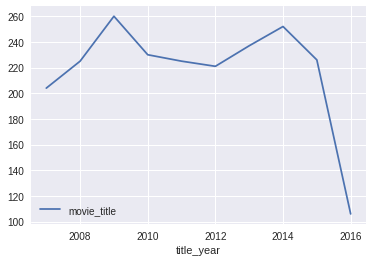

In [40]:
movies[(movies.title_year>=2007)].groupby('title_year')[['movie_title']].count().plot()

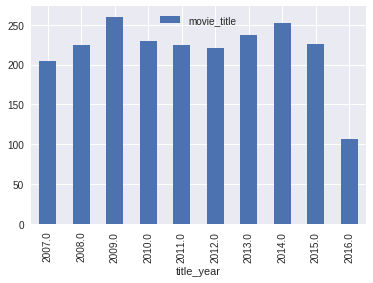

In [41]:
movies[(movies.title_year>=2007)].groupby('title_year')[['movie_title']].count().plot(kind='bar')

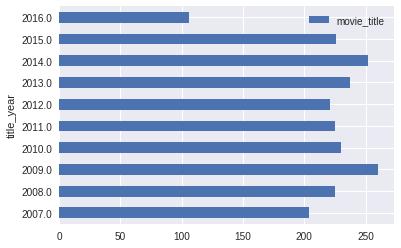

In [42]:
movies[(movies.title_year>=2007)].groupby('title_year')[['movie_title']].count().plot(kind='barh')

# Try it

## Python review

Write a function to add a certain number of minutes to a time

In [0]:
def add_minutes(num_minutes, hour, minute):
  # return a time tuple
  return (hour, minute)

In [44]:
#assert((4, 0) == add_minutes(80, 2, 40))

AssertionError: ignored

## Analyzing IMDB dataset with pandas

Which director with at least 3 films has the highest average gross? Who has the highest average imdb_score?

What are the highest-grossing films by genre? What are the highest imdb_score by genre?

Which actors with at least 3 films have the highest gross? Which ones have the highest imdb_score? You will have to combine actor_1, actor_2, and actor_3 together. Hint, you will want to look up concat, rename, and copy

Movie gross does not adjust for inflation. Calculate the average gross per movie per year. Calculate adjusted_gross as the ratio between gross and the median yearly gross. Which movies have the highest adjusted_gross?